In [349]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [350]:
PATH = 'images/boxes'
INPUT_SIZE = (224, 224, 3)

In [351]:
with open("categories.txt", "r") as file:
    categories = file.read().splitlines()
    
num_classes = len(categories)

In [352]:
dataset = []
X = []
y = []

i = 0
for folder in categories:
    files = os.listdir(f'{PATH}/{categories[i]}')
    for file in files:
        img = cv.imread(f'{PATH}/{categories[i]}/{file}')
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, INPUT_SIZE[:2])
        dataset.append([img, i])
    i += 1

In [353]:
for images, labels in dataset:
    X.append(images)
    y.append(labels)

In [354]:
X = np.array(X).reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
X = X / 255

In [355]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [356]:
y_cat_train = to_categorical(y_train, num_classes)
y_cat_test = to_categorical(y_test, num_classes)

In [376]:
epochs = 10
lr = 1e-4
batch_size = 6

print(batch_size)

input = tf.keras.layers.Input(INPUT_SIZE)

conv_1 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(input)
pool_1 = MaxPool2D(pool_size=(2,2))(conv_1)

conv_2 = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(pool_1)
pool_2 = MaxPool2D(pool_size=(2,2))(conv_2)

flatten = Flatten()(pool_2)

dense = Dense(128)(flatten)
dropout = Dropout(0.2)(dense)

output = Dense(num_classes, activation="sigmoid")(dropout)

model = Model(inputs=[input], outputs=[output])
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=lr, decay=lr / epochs), metrics=["accuracy"])

6


In [377]:
model.fit(X_train, y_cat_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])

Train on 110 samples, validate on 13 samples
Epoch 1/10
110/110 [==============================] - 21s 194ms/sample - loss: 1.9632 - accuracy: 0.5273 - val_loss: 0.4080 - val_accuracy: 0.8846
Epoch 2/10
110/110 [==============================] - 20s 186ms/sample - loss: 0.6979 - accuracy: 0.6773 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 3/10
110/110 [==============================] - 22s 203ms/sample - loss: 0.3717 - accuracy: 0.8318 - val_loss: 0.4924 - val_accuracy: 0.6923
Epoch 4/10
110/110 [==============================] - 21s 192ms/sample - loss: 0.2709 - accuracy: 0.9091 - val_loss: 0.4609 - val_accuracy: 0.7308


In [378]:
loss, acc = model.evaluate(X_test, y_cat_test)
print("LOSS: {}, ACC: {}".format(loss, acc * 100))

14/14 [==============================] - 1s 47ms/sample - loss: 0.4733 - accuracy: 0.7500
LOSS: 0.47333842515945435, ACC: 75.0


In [379]:
pred = model.predict(X_test)

1

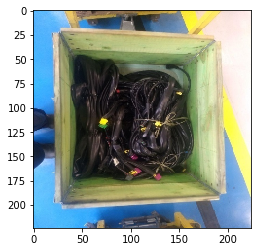

In [385]:
img = X_test[1]
plt.imshow(img)
img = img.reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
model.predict(img)[0].argmax()

In [386]:
model.save('models/emptybox.h5')

In [312]:
img = cv.imread('images/boxes/test/6.png', 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img.shape
img = cv.resize(img, (224,224))
img = img / 255
plt.imshow(img)
img = img.reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
model.predict(img)


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [289]:
X_train.shape

(96, 224, 224, 3)